# Check extra host data

In [2]:
import polars as pl

relabeled_host_df = pl.read_csv('relabeled_datasets/train_host_extra.csv')
relabeled_host_df.head()

SMILES,Tg,FFV,Tc,Density,Rg
str,f64,f64,f64,f64,f64
"""*Oc1ccc(/N=C/C=N/c2ccc(OC(=O)N…",98.638333,0.354566,0.237436,1.06817,16.479541
"""*CC(F)(F)C1(F)CC(C(O)(C(F)(F)F…",10.916464,0.31897,0.102049,1.226474,15.589463
"""*CCCCOC(=O)CCCCCCCC(=O)O*""",-23.218988,0.352278,0.259469,0.993399,20.42647
"""*CCCCCCCCCCc1ccc(-c2c(-c3ccccc…",177.048613,0.399035,0.334328,0.927258,21.333276
"""*c1ccc(-c2ccc(-c3sc(*)c(CCCCCC…",37.73761,0.427989,0.360618,0.959014,17.871737


In [3]:
host_df = pl.read_csv('../data/from_host_v2/train_host_extra.csv')
host_df.head()

SMILES,Tg,FFV,Tc,Density,Rg
str,str,f64,f64,str,str
"""*Oc1ccc(/N=C/C=N/c2ccc(OC(=O)N…",null,null,0.349,null,null
"""*CC(F)(F)C1(F)CC(C(O)(C(F)(F)F…",null,0.320846,0.109,null,null
"""*CCCCOC(=O)CCCCCCCC(=O)O*""",null,null,0.241,null,null
"""*CCCCCCCCCCc1ccc(-c2c(-c3ccccc…",null,0.398266,0.21,null,null
"""*c1ccc(-c2ccc(-c3sc(*)c(CCCCCC…",null,null,0.299,null,null


/tmp/ipykernel_680349/3742052380.py:13: DeprecationWarning: `is_in` with a collection of the same datatype is ambiguous and deprecated.
Please use `implode` to return to previous behavior.

See https://github.com/pola-rs/polars/issues/22149 for more information.
  filtered_preds_df = relabeled_host_df.filter(pl.col('SMILES').is_in(filtered_labels_df['SMILES']))


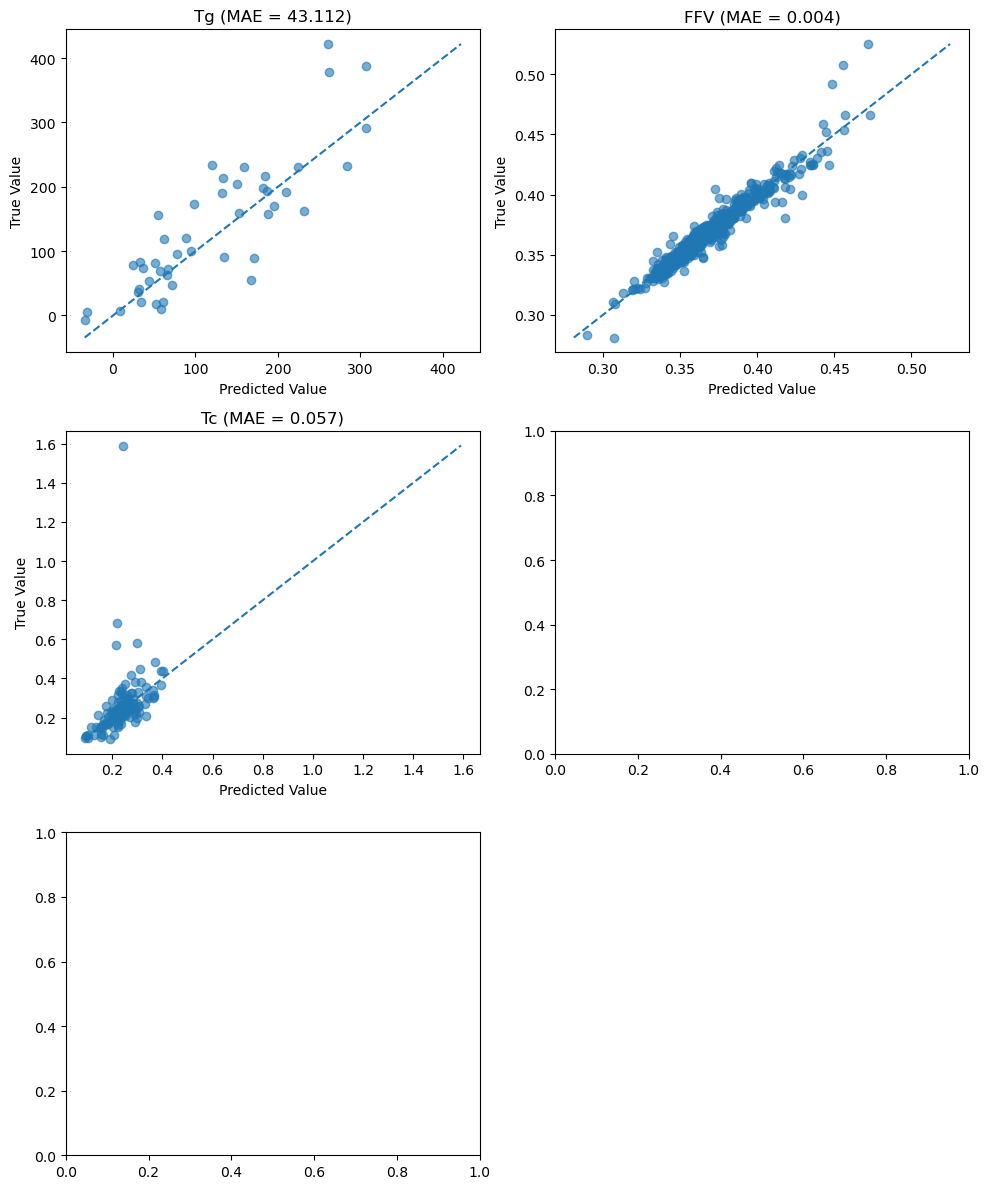

In [12]:
import numpy as np
import matplotlib.pyplot as plt

TARGET_NAMES = ["Tg", "FFV", "Tc", "Density", "Rg"]

figure, axes_array = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 12))
axes_array = axes_array.flatten()

for subplot_index, target_name in enumerate(TARGET_NAMES):
    axis = axes_array[subplot_index]

    filtered_labels_df = host_df.drop_nulls(subset=target_name)
    filtered_preds_df = relabeled_host_df.filter(pl.col('SMILES').is_in(filtered_labels_df['SMILES']))

    true_values = np.array([float(value) for value in filtered_labels_df[target_name].to_numpy()])
    predicted_values = np.array([float(value) for value in filtered_preds_df[target_name].to_numpy()])

    if len(true_values) == 0:
        continue

    axis.scatter(predicted_values, true_values, alpha = 0.6)

    # Identity line for visual reference
    diagonal_minimum = float(min(predicted_values.min(), true_values.min()))
    diagonal_maximum = float(max(predicted_values.max(), true_values.max()))
    axis.plot([diagonal_minimum, diagonal_maximum],
              [diagonal_minimum, diagonal_maximum],
              linestyle = "--")

    mean_absolute_error = float(np.mean(np.abs(predicted_values - true_values)))
    axis.set_title(f"{target_name} (MAE = {mean_absolute_error:.3f})")
    axis.set_xlabel("Predicted Value")
    axis.set_ylabel("True Value")

# Hide the unused sixth subplot
if len(TARGET_NAMES) < len(axes_array):
    axes_array[-1].set_visible(False)

figure.tight_layout()
plt.show()


# Check leak data

In [14]:
leak_preds_df = pl.read_csv('relabeled_datasets/train_tc-natsume_full-dmitry_extra.csv')
leak_preds_df.head()

SMILES,Tg,FFV,Tc,Density,Rg
str,f64,f64,f64,f64,f64
"""Cc1ccc(NC=S)cc1""",105.167213,0.380059,0.240362,1.042567,18.103305
"""FC(F)(F)C(Cl)Cl""",29.901081,0.363941,0.153756,1.211909,19.860019
"""*CCC(C)(C)CC(C)CNC(=O)CCCCC(=O…",51.473217,0.341021,0.259974,0.9412,16.146797
"""*c1ccc(-c2ccc(-c3ccc(C(*)c4c(F…",254.86534,0.401851,0.200267,1.100275,23.191832
"""c1ccc(C2=C(c3ccccc3)CCCC2)cc1""",136.242006,0.390639,0.230768,0.94446,15.615252


In [15]:
leak_labels_df = pl.read_csv('../data/from_host_v2/train_tc-natsume_full-dmitry_extra.csv')
leak_labels_df.head()

SMILES,Tg,FFV,Tc,Density,Rg
str,f64,str,f64,f64,str
"""Cc1ccc(NC=S)cc1""",null,null,null,1.342,null
"""FC(F)(F)C(Cl)Cl""",-214.15,null,null,null,null
"""*CCC(C)(C)CC(C)CNC(=O)CCCCC(=O…",54.82,null,null,null,null
"""*c1ccc(-c2ccc(-c3ccc(C(*)c4c(F…",null,null,0.291,null,null
"""c1ccc(C2=C(c3ccccc3)CCCC2)cc1""",-43.15,null,null,null,null


/tmp/ipykernel_680349/1717515054.py:8: DeprecationWarning: `is_in` with a collection of the same datatype is ambiguous and deprecated.
Please use `implode` to return to previous behavior.

See https://github.com/pola-rs/polars/issues/22149 for more information.
  filtered_preds_df = leak_preds_df.filter(pl.col('SMILES').is_in(filtered_labels_df['SMILES']))


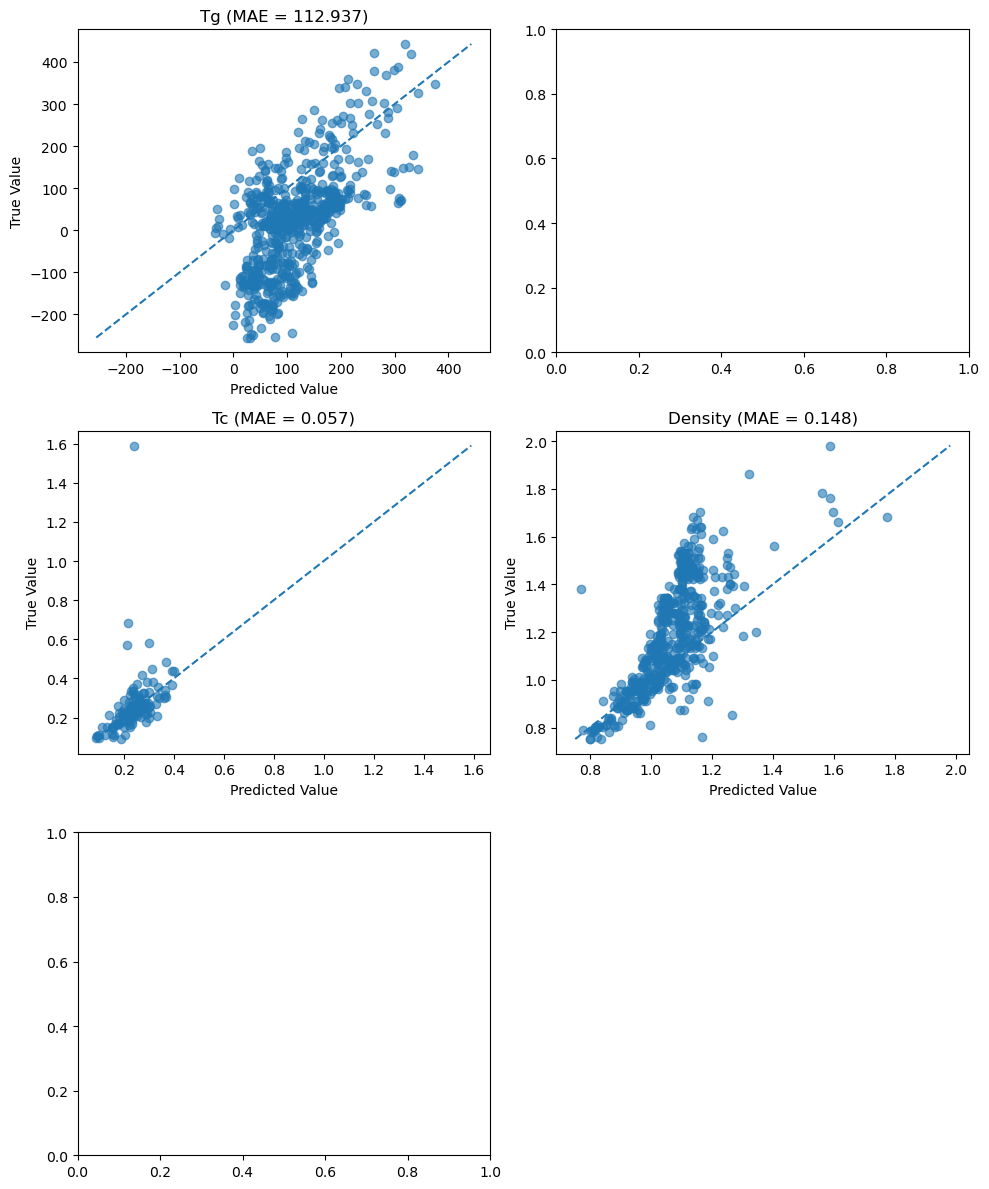

In [16]:
figure, axes_array = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 12))
axes_array = axes_array.flatten()

for subplot_index, target_name in enumerate(TARGET_NAMES):
    axis = axes_array[subplot_index]

    filtered_labels_df = leak_labels_df.drop_nulls(subset=target_name)
    filtered_preds_df = leak_preds_df.filter(pl.col('SMILES').is_in(filtered_labels_df['SMILES']))

    true_values = np.array([float(value) for value in filtered_labels_df[target_name].to_numpy()])
    predicted_values = np.array([float(value) for value in filtered_preds_df[target_name].to_numpy()])

    if len(true_values) == 0:
        continue

    axis.scatter(predicted_values, true_values, alpha = 0.6)

    # Identity line for visual reference
    diagonal_minimum = float(min(predicted_values.min(), true_values.min()))
    diagonal_maximum = float(max(predicted_values.max(), true_values.max()))
    axis.plot([diagonal_minimum, diagonal_maximum],
              [diagonal_minimum, diagonal_maximum],
              linestyle = "--")

    mean_absolute_error = float(np.mean(np.abs(predicted_values - true_values)))
    axis.set_title(f"{target_name} (MAE = {mean_absolute_error:.3f})")
    axis.set_xlabel("Predicted Value")
    axis.set_ylabel("True Value")

# Hide the unused sixth subplot
if len(TARGET_NAMES) < len(axes_array):
    axes_array[-1].set_visible(False)

figure.tight_layout()
plt.show()

# Check natsume leak datasets

In [18]:
import pandas as pd

extra_tg_df = pd.read_csv('../data/from_natsume/Tg_SMILES_class_pid_polyinfo_median.csv')
display(extra_tg_df.head(3))

extra_tc_df = pd.read_csv('../data/from_natsume/Tc_SMILES.csv')
display(extra_tc_df.head(3))

,SMILES,PID,Polymer Class,Tg
0,*C*,P010001,Polyolefins,-54.0
1,*CC(*)C,P010002,Polyolefins,-3.0
2,*CC(*)CC,P010003,Polyolefins,-24.1


,TC_mean,SMILES
0,0.244500,*CC(*)C
1,0.225333,*CC(*)CC
2,0.246333,*CC(*)CCC


In [19]:
from rdkit import Chem

def canonicalize_smiles(smiles: str) -> str:
    molecule = Chem.MolFromSmiles(smiles)
    return Chem.MolToSmiles(molecule, canonical=True) if molecule is not None else None

extra_tg_df['SMILES'] = extra_tg_df['SMILES'].map(canonicalize_smiles)
extra_tc_df['SMILES'] = extra_tc_df['SMILES'].map(canonicalize_smiles)

extra_tc_df = extra_tc_df.rename(columns={'TC_mean': 'Tc'})

display(extra_tg_df.head(3))
display(extra_tc_df.head(3))

,SMILES,PID,Polymer Class,Tg
0,*C*,P010001,Polyolefins,-54.0
1,*CC(*)C,P010002,Polyolefins,-3.0
2,*CC(*)CC,P010003,Polyolefins,-24.1


,Tc,SMILES
0,0.244500,*CC(*)C
1,0.225333,*CC(*)CC
2,0.246333,*CC(*)CCC


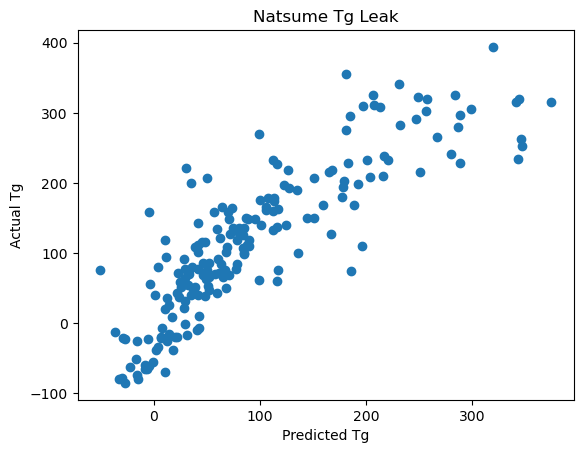

In [24]:
annotated_natsume_tg_df = (
    pl.from_pandas(extra_tg_df)
    .join(leak_preds_df, on='SMILES', how='inner')
    .with_columns(
        pl.col('Tg').alias('Tg_label'),
        pl.col('Tg_right').alias('Tg_pred'),
    )
)

plt.scatter(annotated_natsume_tg_df['Tg_pred'], annotated_natsume_tg_df['Tg_label'])
plt.title('Natsume Tg Leak')
plt.xlabel('Predicted Tg')
plt.ylabel('Label Tg')
plt.show()

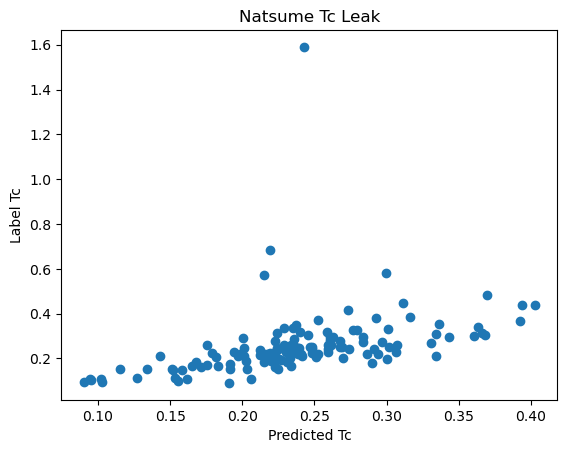

In [27]:
annotated_natsume_tc_df = (
    pl.from_pandas(extra_tc_df)
    .join(leak_preds_df, on='SMILES', how='inner')
    .with_columns(
        pl.col('Tc').alias('Tc_label'),
        pl.col('Tc_right').alias('Tc_pred'),
    )
)

plt.scatter(annotated_natsume_tc_df['Tc_pred'], annotated_natsume_tc_df['Tc_label'])
plt.title('Natsume Tc Leak')
plt.xlabel('Predicted Tc')
plt.ylabel('Label Tc')
plt.show()

# Check dmitry leak datasets

In [37]:
# https://springernature.figshare.com/articles/dataset/dataset_with_glass_transition_temperature/24219958?file=42507037
data_tg2 = pd.read_csv('../data/from_dmitry/archive/JCIM_sup_bigsmiles.csv', usecols=['SMILES', 'Tg (C)'])
data_tg2['SMILES'] = data_tg2['SMILES'].apply(lambda s: canonicalize_smiles(s))
data_tg2 = data_tg2.rename(columns={'Tg (C)': 'Tg'})

# https://www.sciencedirect.com/science/article/pii/S2590159123000377#ec0005
data_tg3 = pd.read_excel('../data/from_dmitry/archive/data_tg3.xlsx')
data_tg3['SMILES'] = data_tg3['SMILES'].apply(lambda s: canonicalize_smiles(s))
data_tg3 = data_tg3.rename(columns={'Tg [K]': 'Tg'})
data_tg3['Tg'] = data_tg3['Tg'] - 273.15

# https://github.com/Duke-MatSci/ChemProps
data_density = pd.read_excel('../data/from_dmitry/archive/data_dnst1.xlsx')
data_density = data_density.rename(columns={'density(g/cm3)': 'Density'})[['SMILES', 'Density']]
data_density['SMILES'] = data_density['SMILES'].apply(lambda s: canonicalize_smiles(s))
data_density = data_density[(data_density['SMILES'].notnull())&(data_density['Density'].notnull())&(data_density['Density'] != 'nylon')]
data_density['Density'] = data_density['Density'].astype('float64')
data_density['Density'] -= 0.118

[23:25:46] SMILES Parse Error: syntax error while parsing: *O[Si](*)([R])[R]
[23:25:46] SMILES Parse Error: check for mistakes around position 12:
[23:25:46] *O[Si](*)([R])[R]
[23:25:46] ~~~~~~~~~~~^
[23:25:46] SMILES Parse Error: Failed parsing SMILES '*O[Si](*)([R])[R]' for input: '*O[Si](*)([R])[R]'
[23:25:46] SMILES Parse Error: syntax error while parsing: *NC(=O)c4ccc3c(=O)n(c2ccc([R]c1ccc(*)cc1)cc2)c(=O)c3c4
[23:25:46] SMILES Parse Error: check for mistakes around position 28:
[23:25:46] c4ccc3c(=O)n(c2ccc([R]c1ccc(*)cc1)cc2)c(=
[23:25:46] ~~~~~~~~~~~~~~~~~~~~^
[23:25:46] SMILES Parse Error: Failed parsing SMILES '*NC(=O)c4ccc3c(=O)n(c2ccc([R]c1ccc(*)cc1)cc2)c(=O)c3c4' for input: '*NC(=O)c4ccc3c(=O)n(c2ccc([R]c1ccc(*)cc1)cc2)c(=O)c3c4'
[23:25:46] SMILES Parse Error: syntax error while parsing: O=C=N[R1]N=C=O.O[R2]O.O[R3]O
[23:25:46] SMILES Parse Error: check for mistakes around position 7:
[23:25:46] O=C=N[R1]N=C=O.O[R2]O.O[R3]O
[23:25:46] ~~~~~~^
[23:25:46] SMILES Parse Error: F

In [31]:
display(data_tg2.head())
display(data_tg3.head())
display(data_density.head())

,SMILES,Tg
0,*Oc1ccc(CNC(=O)CCCCCCC(=O)NCc2ccc(OC3COC4C(*)C...,21.581731
1,*OC(C)CCC(C)OC(=O)Nc1ccc(Cc2ccc(NC(*)=O)cc2)cc1,63.589338
2,*CCCC(=O)NCc1ccc(CNC(=O)CCCOC(=O)c2ccc(C(=O)O*...,53.557261
3,*CCOC(=O)NCCNC(=O)O*,5.896093
4,*CCCCCS*,-55.378610


,SMILES,Tg
0,CC1(C)OC[C@H](CO)O1,8.85
1,COC(=O)[C@H](C)O,12.85
2,FC(F)C(F)C(F)(F)F,-178.15
3,FCC(F)(F)F,-202.15
4,CC(F)(Cl)Cl,-232.15


,SMILES,Density
0,NC(=O)Oc1cccs1,1.462
1,*OCCOC(=O)Nc1ccc(Cc2ccc(NC(*)=O)cc2)cc1,1.252
2,NC(=O)OC=S,1.532
3,NC(=O)Nc1cccs1,1.642
4,NC=O,1.352


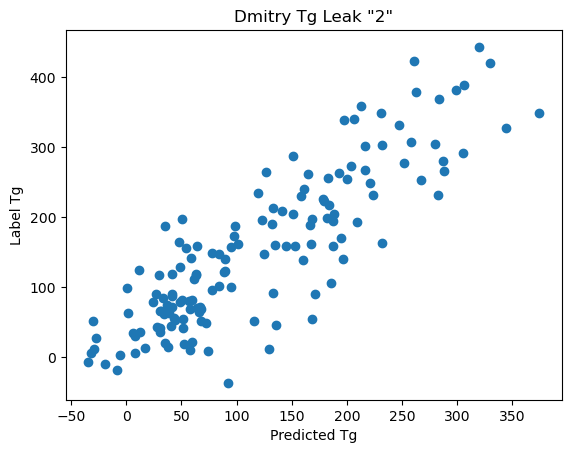

In [33]:
annotated_dmitry_tg_2_df = (
    pl.from_pandas(data_tg2)
    .join(leak_preds_df, on='SMILES', how='inner')
    .with_columns(
        pl.col('Tg').alias('Tg_label'),
        pl.col('Tg_right').alias('Tg_pred'),
    )
)

plt.scatter(annotated_dmitry_tg_2_df['Tg_pred'], annotated_dmitry_tg_2_df['Tg_label'])
plt.title('Dmitry Tg Leak "2"')
plt.xlabel('Predicted Tg')
plt.ylabel('Label Tg')
plt.show()

130.68894918009266


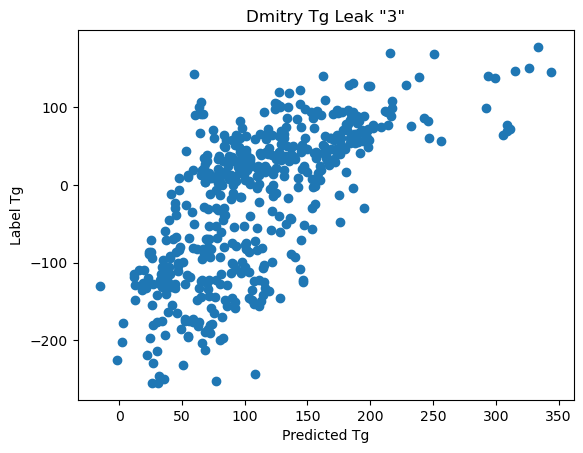

In [72]:
annotated_dmitry_tg_3_df = (
    pl.from_pandas(data_tg3)
    .join(leak_preds_df, on='SMILES', how='inner')
    .with_columns(
        pl.col('Tg').alias('Tg_label'),
        pl.col('Tg_right').alias('Tg_pred'),
    )
)

print(mean_absolute_error(annotated_dmitry_tg_3_df['Tg_label'], annotated_dmitry_tg_3_df['Tg_pred']))

plt.scatter(annotated_dmitry_tg_3_df['Tg_pred'], annotated_dmitry_tg_3_df['Tg_label'])
plt.title('Dmitry Tg Leak "3"')
plt.xlabel('Predicted Tg')
plt.ylabel('Label Tg')
plt.show()

shape: (5, 9)
┌────────────┬─────────┬────────────┬──────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ SMILES     ┆ Density ┆ Tg         ┆ FFV      ┆ … ┆ Density_r ┆ Rg        ┆ Density_l ┆ Density_p │
│ ---        ┆ ---     ┆ ---        ┆ ---      ┆   ┆ ight      ┆ ---       ┆ abel      ┆ red       │
│ str        ┆ f64     ┆ f64        ┆ f64      ┆   ┆ ---       ┆ f64       ┆ ---       ┆ ---       │
│            ┆         ┆            ┆          ┆   ┆ f64       ┆           ┆ f64       ┆ f64       │
╞════════════╪═════════╪════════════╪══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Cc1ccc(NC= ┆ 1.342   ┆ 105.167213 ┆ 0.380059 ┆ … ┆ 1.042567  ┆ 18.103305 ┆ 1.342     ┆ 1.042567  │
│ S)cc1      ┆         ┆            ┆          ┆   ┆           ┆           ┆           ┆           │
│ *CC(*)OC(C ┆ 1.102   ┆ 29.465625  ┆ 0.333134 ┆ … ┆ 1.017499  ┆ 16.179891 ┆ 1.102     ┆ 1.017499  │
│ )=O        ┆         ┆            ┆          ┆   ┆           ┆           ┆ 

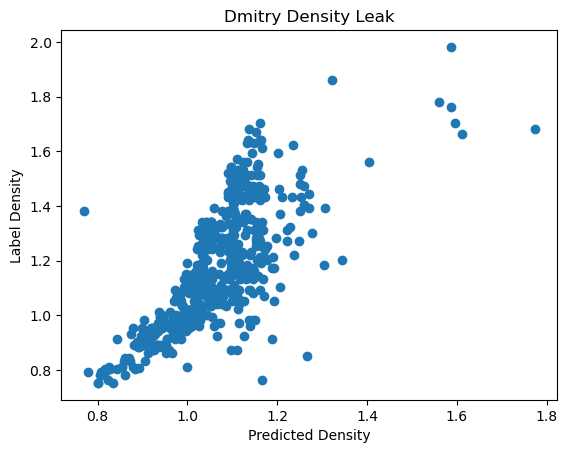

In [44]:
annotated_dmitry_density_df = (
    pl.from_pandas(data_density)
    .join(leak_preds_df, on='SMILES', how='inner')
    .with_columns(
        pl.col('Density').alias('Density_label'),
        pl.col('Density_right').alias('Density_pred'),
    )
)
print(annotated_dmitry_density_df.head())

plt.scatter(annotated_dmitry_density_df['Density_pred'], annotated_dmitry_density_df['Density_label'])
plt.title('Dmitry Density Leak')
plt.xlabel('Predicted Density')
plt.ylabel('Label Density')
plt.show()

# Check RadonPy data

In [73]:
radonpy_labels_df = pd.read_csv('../data/RadonPy/data/PI1070.csv')
radonpy_labels_df.head()

,monomer_ID,SMILES,mol_weight_monomer,atomic_weight_mean,vdw_volume_monomer,qm_total_energy_monomer,qm_homo_monomer,qm_lumo_monomer,qm_dipole_monomer,qm_dipole_x_monomer,...,TC_improper_min,TC_improper_max,TC_improper_std,TC_improper_count,TC_kspace,TC_kspace_min,TC_kspace_max,TC_kspace_std,TC_kspace_count,polymer_class
0,PI1,*CC*,28.054,4.675667,45.008,-209676.7175,-12.037272,3.128817,0.000009,0.000006,...,0.0,0.0,0.0,5.0,0.000014,-0.000028,0.000029,0.000024,5.0,1
1,PI2,*C(C*)C,42.081,4.675667,61.624,-312948.9242,-11.576865,3.039961,0.077278,0.003980,...,0.0,0.0,0.0,5.0,0.000279,-0.000165,0.000562,0.000302,5.0,1
2,PI3,*C(C*)CC,56.108,4.675667,78.424,-416219.2389,-11.423908,2.987135,0.081852,-0.003192,...,0.0,0.0,0.0,5.0,0.000059,-0.000043,0.000288,0.000133,5.0,1
3,PI4,*C(C*)CCC,70.135,4.675667,95.392,-519493.4190,-11.227201,3.052917,0.075347,0.003630,...,0.0,0.0,0.0,5.0,0.000081,0.000031,0.000146,0.000046,5.0,1
4,PI5,*C(C*)C(C)C,70.135,4.675667,95.216,-519497.3697,-11.171034,2.957730,0.085636,0.032327,...,0.0,0.0,0.0,5.0,0.000057,-0.000576,0.000607,0.000449,5.0,1


In [47]:
radonpy_predictions_df = pd.read_csv('relabeled_datasets/PI1070.csv')
radonpy_predictions_df.head()

,monomer_ID,SMILES,mol_weight_monomer,atomic_weight_mean,vdw_volume_monomer,qm_total_energy_monomer,qm_homo_monomer,qm_lumo_monomer,qm_dipole_monomer,qm_dipole_x_monomer,...,TC_kspace,TC_kspace_min,TC_kspace_max,TC_kspace_std,TC_kspace_count,polymer_class,Tg,FFV,Tc,Density
0,PI1,*CC*,28.054,4.675667,45.008,-209676.7175,-12.037272,3.128817,0.000009,0.000006,...,0.000014,-0.000028,0.000029,0.000024,5.0,1,31.317125,0.401584,0.267555,0.883581
1,PI2,*C(C*)C,42.081,4.675667,61.624,-312948.9242,-11.576865,3.039961,0.077278,0.003980,...,0.000279,-0.000165,0.000562,0.000302,5.0,1,33.683422,0.391560,0.231105,0.816568
2,PI3,*C(C*)CC,56.108,4.675667,78.424,-416219.2389,-11.423908,2.987135,0.081852,-0.003192,...,0.000059,-0.000043,0.000288,0.000133,5.0,1,24.986134,0.395427,0.222851,0.801852
3,PI4,*C(C*)CCC,70.135,4.675667,95.392,-519493.4190,-11.227201,3.052917,0.075347,0.003630,...,0.000081,0.000031,0.000146,0.000046,5.0,1,16.194169,0.401646,0.224904,0.785187
4,PI5,*C(C*)C(C)C,70.135,4.675667,95.216,-519497.3697,-11.171034,2.957730,0.085636,0.032327,...,0.000057,-0.000576,0.000607,0.000449,5.0,1,46.836026,0.390032,0.190070,0.771688


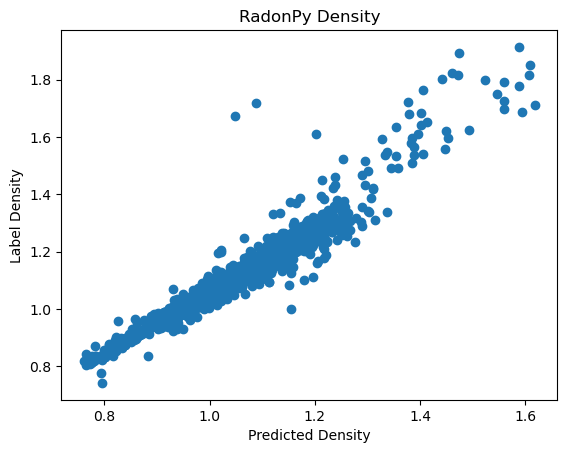

In [54]:
radonpy_density_df = (
    pl.from_pandas(radonpy_labels_df)
    .join(pl.from_pandas(radonpy_predictions_df), on='SMILES', how='inner')
    .with_columns(
        pl.col('density').alias('Density_label'),
        pl.col('Density').alias('Density_pred'),
    )
)

plt.scatter(radonpy_density_df['Density_pred'], radonpy_density_df['Density_label'])
plt.title('RadonPy Density')
plt.xlabel('Predicted Density')
plt.ylabel('Label Density')
plt.show()

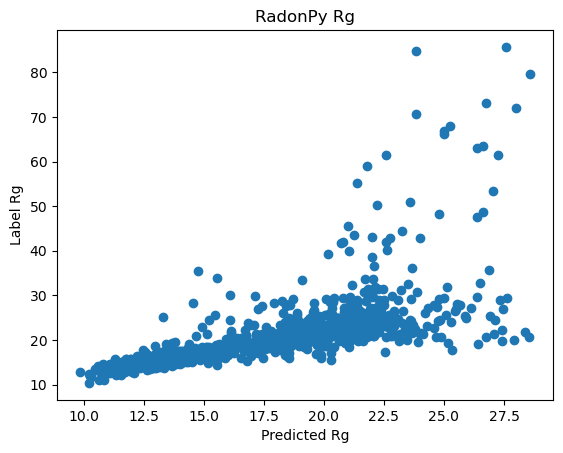

In [55]:
radonpy_rg_df = (
    pl.from_pandas(radonpy_labels_df)
    .join(pl.from_pandas(radonpy_predictions_df), on='SMILES', how='inner')
    .with_columns(
        pl.col('Rg').alias('Rg_label'),
        pl.col('Rg_right').alias('Rg_pred'),
    )
)

plt.scatter(radonpy_rg_df['Rg_pred'], radonpy_rg_df['Rg_label'])
plt.title('RadonPy Rg')
plt.xlabel('Predicted Rg')
plt.ylabel('Label Rg')
plt.show()

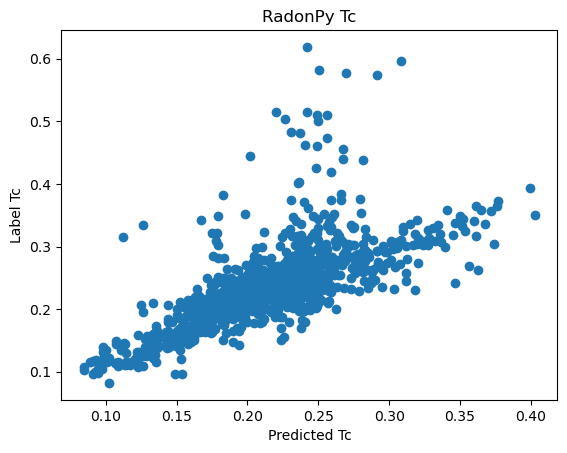

In [57]:
radonpy_density_df = (
    pl.from_pandas(radonpy_labels_df)
    .join(pl.from_pandas(radonpy_predictions_df), on='SMILES', how='inner')
    .with_columns(
        pl.col('thermal_conductivity').alias('Tc_label'),
        pl.col('Tc').alias('Tc_pred'),
    )
)

plt.scatter(radonpy_density_df['Tc_pred'], radonpy_density_df['Tc_label'])
plt.title('RadonPy Tc')
plt.xlabel('Predicted Tc')
plt.ylabel('Label Tc')
plt.show()

# Check "curated" Tg dataset

https://zenodo.org/records/15210035

In [58]:
lamalab_tg_labels_df = pd.read_csv('../data/LAMALAB_CURATED_Tg_structured_polymerclass.csv')
lamalab_tg_labels_df.head()

,PSMILES,meta.polymer,SMILES,labels.Exp_Tg(K),meta.source,meta.tg_range,meta.tg_values,meta.num_of_points,meta.std,meta.reliability,...,fullpolymerlevel.features.bromine_count_sum_fullpolymerfeaturizer,fullpolymerlevel.features.single_bonds_sum_fullpolymerfeaturizer,fullpolymerlevel.features.double_bonds_sum_fullpolymerfeaturizer,fullpolymerlevel.features.triple_bonds_sum_fullpolymerfeaturizer,fullpolymerlevel.features.bridging_rings_count_sum_fullpolymerfeaturizer,fullpolymerlevel.features.max_ring_size_sum_fullpolymerfeaturizer,fullpolymerlevel.features.heteroatom_density_sum_fullpolymerfeaturizer,fullpolymerlevel.features.heteroatom_count_sum_fullpolymerfeaturizer,meta.polymer_class,raw_polymer_class
0,[*]#C[SiH2]C#Cc1cccc(C#[*])c1,NaN,*C#Cc1cccc(C#C[SiH2]*)c1,345.15,GREA,345.15,NaN,1,0.0,black,...,0,4,0,3,0,6,0.230769,3,Polysiloxanes,Polysiloxanes/silanes
1,[*]#Cc1cccc(C#C[SiH](C#[*])c2ccccc2)c1,NaN,*C#Cc1cccc(C#C[SiH](*)c2ccccc2)c1,358.15,GREA,358.15,NaN,1,0.0,black,...,0,5,0,3,0,6,0.157895,3,Polysiloxanes,Polysiloxanes/silanes
2,[*]#Cc1ccccc1C#C[SiH](C#[*])c1ccccc1,NaN,*C#Cc1ccccc1C#C[SiH](*)c1ccccc1,344.15,GREA,344.15,NaN,1,0.0,black,...,0,5,0,3,0,6,0.157895,3,Polysiloxanes,Polysiloxanes/silanes
3,[*]/C(=C(/[*])c1ccc(C(C)(C)C)cc1)c1ccccc1,NaN,*/C(=C(/*)c1ccc(C(C)(C)C)cc1)c1ccccc1,473.15,GREA,473.15,NaN,1,0.0,black,...,0,8,1,0,0,6,0.100000,2,Polyvinyls,Polyvinyls
4,[*]/C(=C(/[*])c1ccc(CCCC)cc1)c1ccccc1,NaN,*/C(=C(/*)c1ccc(CCCC)cc1)c1ccccc1,473.15,GREA,473.15,NaN,1,0.0,black,...,0,8,1,0,0,6,0.100000,2,Polyvinyls,Polyvinyls


In [59]:
lamalab_tg_preds_df = pd.read_csv('relabeled_datasets/LAMALAB_CURATED_Tg_structured_polymerclass.csv')
lamalab_tg_preds_df.head()

,PSMILES,meta.polymer,SMILES,labels.Exp_Tg(K),meta.source,meta.tg_range,meta.tg_values,meta.num_of_points,meta.std,meta.reliability,...,fullpolymerlevel.features.max_ring_size_sum_fullpolymerfeaturizer,fullpolymerlevel.features.heteroatom_density_sum_fullpolymerfeaturizer,fullpolymerlevel.features.heteroatom_count_sum_fullpolymerfeaturizer,meta.polymer_class,raw_polymer_class,Tg,FFV,Tc,Density,Rg
0,[*]#C[SiH2]C#Cc1cccc(C#[*])c1,NaN,*C#Cc1cccc(C#C[SiH2]*)c1,345.15,GREA,345.15,NaN,1,0.0,black,...,6,0.230769,3,Polysiloxanes,Polysiloxanes/silanes,84.951942,0.469421,0.244214,0.998499,20.163918
1,[*]#Cc1cccc(C#C[SiH](C#[*])c2ccccc2)c1,NaN,*C#Cc1cccc(C#C[SiH](*)c2ccccc2)c1,358.15,GREA,358.15,NaN,1,0.0,black,...,6,0.157895,3,Polysiloxanes,Polysiloxanes/silanes,115.143175,0.454664,0.208371,1.004492,16.436322
2,[*]#Cc1ccccc1C#C[SiH](C#[*])c1ccccc1,NaN,*C#Cc1ccccc1C#C[SiH](*)c1ccccc1,344.15,GREA,344.15,NaN,1,0.0,black,...,6,0.157895,3,Polysiloxanes,Polysiloxanes/silanes,120.959117,0.447560,0.199757,1.000020,16.056953
3,[*]/C(=C(/[*])c1ccc(C(C)(C)C)cc1)c1ccccc1,NaN,*/C(=C(/*)c1ccc(C(C)(C)C)cc1)c1ccccc1,473.15,GREA,473.15,NaN,1,0.0,black,...,6,0.100000,2,Polyvinyls,Polyvinyls,168.653407,0.454967,0.187597,0.903960,12.520526
4,[*]/C(=C(/[*])c1ccc(CCCC)cc1)c1ccccc1,NaN,*/C(=C(/*)c1ccc(CCCC)cc1)c1ccccc1,473.15,GREA,473.15,NaN,1,0.0,black,...,6,0.100000,2,Polyvinyls,Polyvinyls,107.731465,0.424013,0.211463,0.942364,12.693747


48.03982963098903


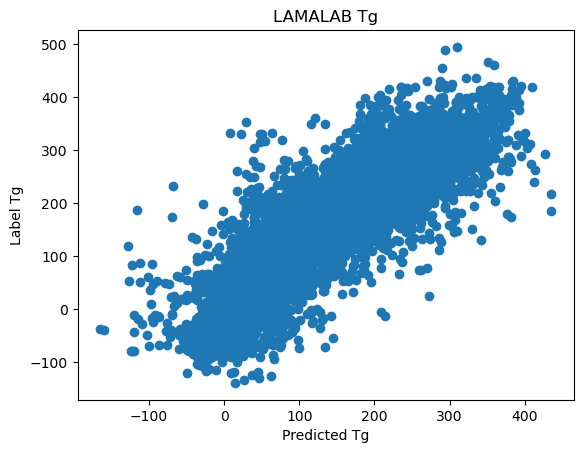

In [68]:
from sklearn.metrics import mean_absolute_error

lamalab_tg_df = (
    pl.from_pandas(lamalab_tg_labels_df)
    .join(pl.from_pandas(lamalab_tg_preds_df), on='SMILES', how='inner')
    .with_columns(
        (pl.col('labels.Exp_Tg(K)') - 273.15).alias('Tg_label'),
        pl.col('Tg').alias('Tg_pred'),
    )
)

print(mean_absolute_error(lamalab_tg_df['Tg_pred'], lamalab_tg_df['Tg_label']))

plt.scatter(lamalab_tg_df['Tg_pred'], lamalab_tg_df['Tg_label'])
plt.title('LAMALAB Tg')
plt.xlabel('Predicted Tg')
plt.ylabel('Label Tg')
plt.show()